<a href="https://colab.research.google.com/github/RahulBattula/Bird-Audio-Classification/blob/main/Final_Code_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bird Audio classification using Sequential, LSTM & VGGish models

In [ ]:
import pandas as pd
import os
import librosa

audio_dataset_path='/content/wavfiles'
metadata=pd.read_csv('/content/bird_songs_metadata.csv')
metadata.head()

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [ ]:
metadata[['filename','name']].head()

,filename,name
0,557838-0.wav,Bewick's Wren
1,557838-1.wav,Bewick's Wren
2,557838-4.wav,Bewick's Wren
3,557838-5.wav,Bewick's Wren
4,557838-6.wav,Bewick's Wren


In [ ]:
metadata['name'].value_counts()

Song Sparrow            1256
Northern Mockingbird    1182
Northern Cardinal       1074
American Robin          1017
Bewick's Wren            893
Name: name, dtype: int64

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'rahulbattula1'
os.environ['KAGGLE_KEY'] = '7220f5ccf343309b5f337d6ad9b49afc'

In [ ]:
# !kaggle datasets download -d vinayshanbhag/bird-song-data-set

In [ ]:
# !unzip bird-song-data-set.zip

Species: Bewick's Wren
Sample rate: 22050
Bit depth: 32 bits
Bit rate: 705600 bps
Number of channels: 1
Audio data shape: (66150,)
Audio file path: /content/wavfiles/205433-0.wav


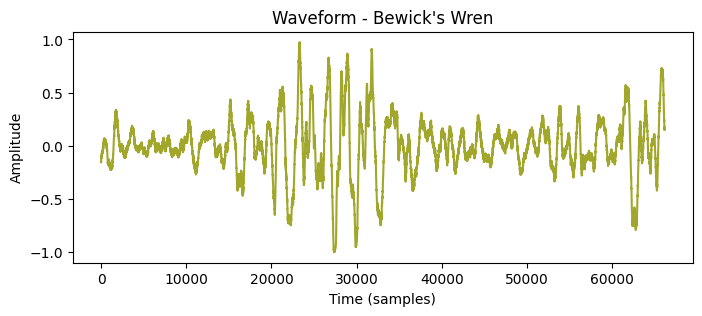

Species: Northern Mockingbird
Sample rate: 22050
Bit depth: 32 bits
Bit rate: 705600 bps
Number of channels: 1
Audio data shape: (66150,)
Audio file path: /content/wavfiles/54018-7.wav


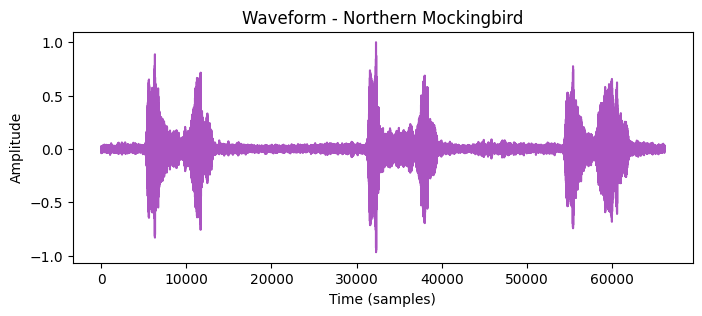

Species: American Robin
Sample rate: 22050
Bit depth: 32 bits
Bit rate: 705600 bps
Number of channels: 1
Audio data shape: (66150,)
Audio file path: /content/wavfiles/190441-14.wav


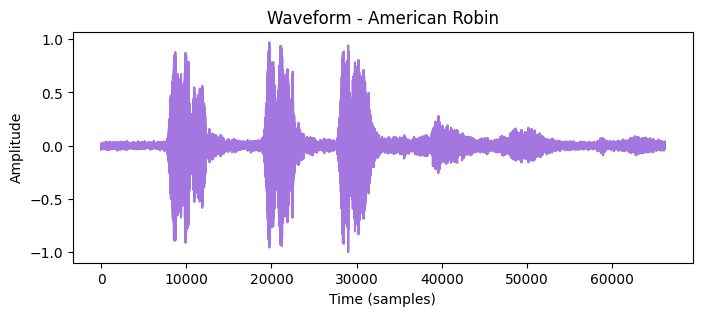

Species: Song Sparrow
Sample rate: 22050
Bit depth: 32 bits
Bit rate: 705600 bps
Number of channels: 1
Audio data shape: (66150,)
Audio file path: /content/wavfiles/103338-9.wav


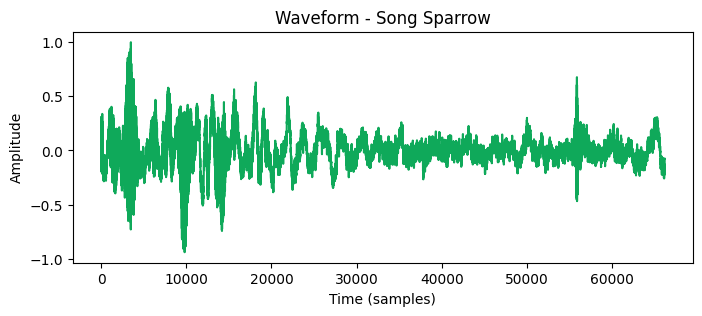

Species: Northern Cardinal
Sample rate: 22050
Bit depth: 32 bits
Bit rate: 705600 bps
Number of channels: 1
Audio data shape: (66150,)
Audio file path: /content/wavfiles/205836-4.wav


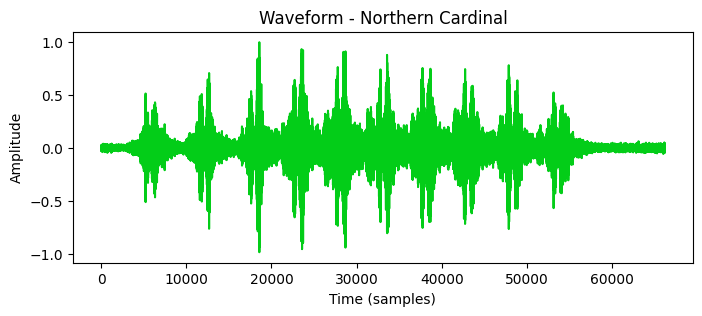

In [ ]:
import os
import random
from scipy.io import wavfile
from IPython.display import Audio, display
import matplotlib.pyplot as plt

audio_folder = "/content/wavfiles"

def plot_and_play_wav(metadata, audio_folder):
    random_row = metadata.sample(n=1).iloc[0]
    audio_file_path = os.path.join(audio_folder, random_row['filename'])

    sample_rate, audio_data = wavfile.read(audio_file_path)
    random_color = '#%06x' % random.randint(0, 0xFFFFFF)

    print(f"Species: {random_row['name']}")
    print(f"Sample rate: {sample_rate}")
    print(f"Bit depth: {audio_data.dtype.itemsize * 8} bits")
    print(f"Bit rate: {sample_rate * audio_data.dtype.itemsize * 8} bps")
    print(f"Number of channels: {audio_data.shape[1] if len(audio_data.shape) > 1 else 1}")
    print(f"Audio data shape: {audio_data.shape}")
    print(f"Audio file path: {audio_file_path}")

    plt.figure(figsize=(8, 3))
    plt.plot(audio_data, color=random_color)
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.title(f"Waveform - {random_row['name']}")
    plt.show()

    # Play the audio file
    display(Audio(audio_file_path))

# Iterate through each unique species and plot a random waveform
unique_species = metadata['name'].unique()
for species in unique_species:
    species_metadata = metadata[metadata['name'] == species]
    plot_and_play_wav(species_metadata, audio_folder)

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["filename"]))
    final_class_labels=row["name"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

5422it [01:53, 47.72it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-132.85225, 81.1399, 17.018223, 54.974297, -1...",Bewick's Wren
1,"[-147.74393, 99.42544, 20.885643, 44.118813, 1...",Bewick's Wren
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",Bewick's Wren
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",Bewick's Wren
4,"[-107.95914, 92.416, 17.773256, 43.13245, -1.8...",Bewick's Wren


In [ ]:
extracted_features_df['feature'].shape

(5422,)

In [ ]:
extracted_features_df['feature'][0].shape

(40,)

In [ ]:
pd.DataFrame(extracted_features_df['feature'][0])

,0
0,-132.852249
1,81.139900
2,17.018223
3,54.974297
4,-10.344644
5,24.577351
6,3.074978
7,19.339340
8,5.271629
9,15.171050


In [ ]:
type(extracted_features_df['feature'])

pandas.core.series.Series

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape

(5422, 40)

In [ ]:
X[0]

array([-1.3285225e+02,  8.1139900e+01,  1.7018223e+01,  5.4974297e+01,
       -1.0344644e+01,  2.4577351e+01,  3.0749781e+00,  1.9339340e+01,
        5.2716289e+00,  1.5171050e+01, -7.2439000e-02,  7.5691247e+00,
        1.0887993e+01,  2.6355217e+00, -1.7921875e-01,  1.0019793e+01,
       -4.8704443e+00,  4.9887242e+00, -3.7375503e+00,  6.2743130e+00,
       -1.8889679e+00,  4.5980167e+00, -8.0816382e-01,  2.9757075e+00,
       -3.2223496e+00,  1.7686204e+00, -6.0264468e+00,  6.5037578e-01,
       -5.6984224e+00,  1.4270592e+00, -4.9387650e+00,  2.9452938e-01,
       -4.3535066e+00,  4.6645731e-01, -5.3959889e+00,  3.4948280e-01,
       -5.3129478e+00, -8.0229342e-01, -4.6149001e+00, -7.0749331e-01],
      dtype=float32)

In [ ]:
y.shape

(5422,)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y[0:10]

array(["Bewick's Wren", "Bewick's Wren", "Bewick's Wren", "Bewick's Wren",
       "Bewick's Wren", "Bewick's Wren", "Bewick's Wren", "Bewick's Wren",
       "Bewick's Wren", "Bewick's Wren"], dtype='<U20')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y[0:10]

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-271.31616   ,  -26.419065  ,  -63.76474   , ...,    2.588676  ,
          -3.9820173 ,    5.081394  ],
       [-401.3699    ,  -31.111538  ,  -92.24524   , ...,   -2.9093552 ,
          -0.48502737,    1.7998823 ],
       [-366.7505    ,   -3.916123  , -118.17853   , ...,   -2.0479555 ,
           1.2964002 ,    0.82310003],
       ...,
       [ -63.003605  ,   88.03719   ,  -30.778547  , ...,   -1.3984175 ,
          -1.852705  ,   -1.1443155 ],
       [-361.90756   ,   30.67692   ,  -64.73752   , ...,   -1.6385154 ,
          -0.99096596,   -0.40422422],
       [-168.7206    ,    1.3105384 ,  -65.46302   , ...,    2.268755  ,
          -1.4256755 ,   -2.3499906 ]], dtype=float32)

In [ ]:
X_train.shape

(4337, 40)

In [ ]:
X_test.shape

(1085, 40)

In [ ]:
y_train.shape

(4337, 5)

In [ ]:
y_test.shape

(1085, 5)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
num_labels=y.shape[1]

In [ ]:
num_labels

5

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=32, epochs=100,
                    validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
132/136 [============================>.] - ETA: 0s - loss: 13.6947 - accuracy: 0.2277
Epoch 1: val_loss improved from inf to 1.61052, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 4s 9ms/step - loss: 13.4648 - accuracy: 0.2250 - val_loss: 1.6105 - val_accuracy: 0.2120
Epoch 2/100
131/136 [===========================>..] - ETA: 0s - loss: 2.5230 - accuracy: 0.2261
Epoch 2: val_loss improved from 1.61052 to 1.60775, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 1s 7ms/step - loss: 2.5021 - accuracy: 0.2262 - val_loss: 1.6078 - val_accuracy: 0.2249
Epoch 3/100
124/136 [==========================>...] - ETA: 0s - loss: 1.8631 - accuracy: 0.2243
Epoch 3: val_loss improved from 1.60775 to 1.60684, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 1s 5ms/step - loss: 1.8527 - accuracy: 0.2267 - val_loss: 1.6068 - val_accuracy: 0.22

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8248847723007202


# Prediction

In [ ]:
filename= "/content/wavfiles/101308-5.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict(mfccs_scaled_features)
predicted_class_index = np.argmax(predicted_label)
prediction_class = labelencoder.inverse_transform([predicted_class_index])
print(f"The predicted bird is: {prediction_class}")

[-2.0822256e+02  4.7379898e+01 -4.1454041e+01  4.0189476e+01
 -2.3528139e+01 -5.5456018e+00  1.8695351e+01  4.9905853e+00
 -7.6499867e+00  1.0349574e+01 -5.9336238e+00  6.0427866e+00
 -5.0681171e+00  8.7633598e-01  1.0736934e+00  2.0575187e+00
 -6.6417365e+00  6.8580632e+00 -2.3993652e+00 -3.3767705e+00
 -1.9962360e-01 -4.6232441e-01 -5.1457605e+00  4.2522545e+00
 -3.9692121e+00  3.8863058e+00 -2.0467761e+00  2.5109694e+00
 -1.9360760e-01  5.4815507e-01 -1.7885621e+00  5.7646203e+00
 -3.4575517e+00  1.9353784e+00  8.3248383e-01  5.5991459e-01
 -9.6621567e-01  5.1436696e+00 -1.4344547e+00  3.3189037e+00]
[[-2.0822256e+02  4.7379898e+01 -4.1454041e+01  4.0189476e+01
  -2.3528139e+01 -5.5456018e+00  1.8695351e+01  4.9905853e+00
  -7.6499867e+00  1.0349574e+01 -5.9336238e+00  6.0427866e+00
  -5.0681171e+00  8.7633598e-01  1.0736934e+00  2.0575187e+00
  -6.6417365e+00  6.8580632e+00 -2.3993652e+00 -3.3767705e+00
  -1.9962360e-01 -4.6232441e-01 -5.1457605e+00  4.2522545e+00
  -3.9692121e+00 

34/34 [==============================] - 0s 3ms/step
Classification Report (Sequential):
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       212
           1       0.74      0.86      0.79       189
           2       0.86      0.89      0.87       214
           3       0.91      0.77      0.83       226
           4       0.83      0.79      0.81       244

    accuracy                           0.84      1085
   macro avg       0.84      0.84      0.84      1085
weighted avg       0.84      0.84      0.84      1085



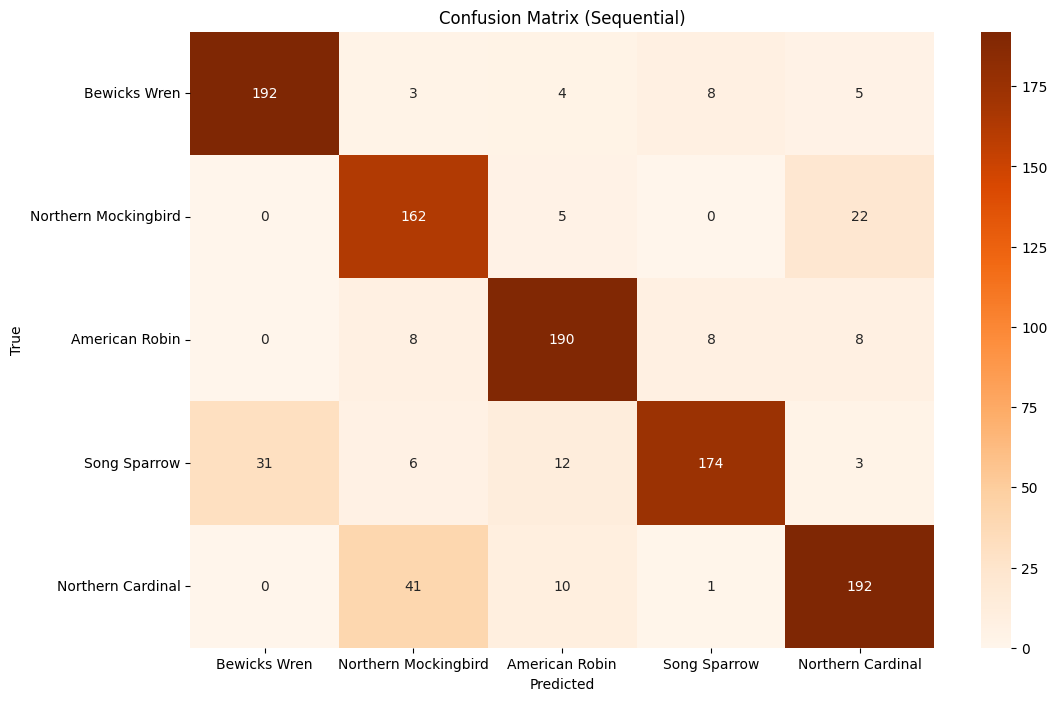

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

def plot_confusion_matrix(conf_matrix, class_names, model_name, save_path=None):
    plt.figure(figsize=(12, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    if save_path:
        plt.savefig(save_path)  # Save the confusion matrix plot as jpg
    else:
        plt.show()

# Load the trained Sequential model
sequential_model = load_model('saved_models/audio_classification.hdf5')

# Make predictions on the test set
y_pred_seq = sequential_model.predict(X_test)

# Convert one-hot encoded labels to class indices
y_true_seq = np.argmax(y_test, axis=1)
y_pred_seq = np.argmax(y_pred_seq, axis=1)

# Generate confusion matrix
conf_matrix_seq = confusion_matrix(y_true_seq, y_pred_seq)

# Plot and save confusion matrix
plot_confusion_matrix(conf_matrix_seq, ['Bewicks Wren', 'Northern Mockingbird', 'American Robin', 'Song Sparrow', 'Northern Cardinal'],
                      'Sequential', 'sequential_confusion_matrix.jpg')

# Print classification report
print("Classification Report (Sequential):\n", classification_report(y_true_seq, y_pred_seq))

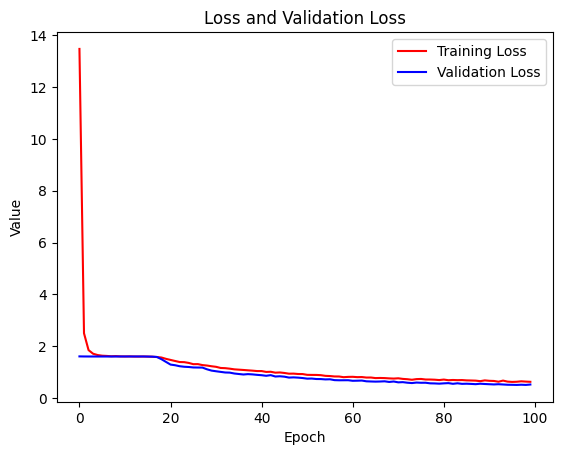

In [ ]:
# Get accuracy and validation accuracy from history
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot both accuracy and val_accuracy
plt.title('Loss and Validation Loss')
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

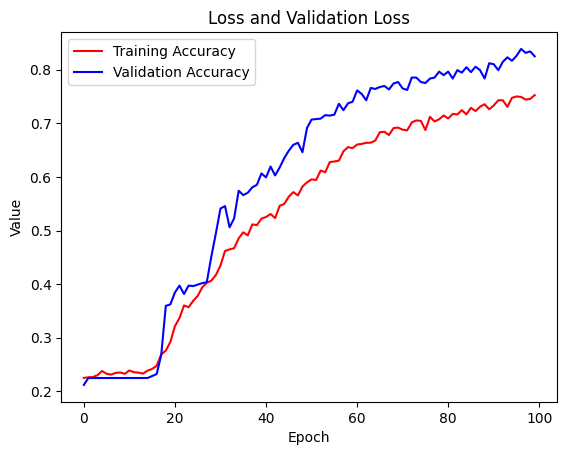

In [ ]:
# Get accuracy and validation accuracy from history
import matplotlib.pyplot as plt
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

# Plot both accuracy and val_accuracy
plt.title('Loss and Validation Loss')
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

# LSTM

In [ ]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_lstm.add(LSTM(128))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(num_labels, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Add a dimension to input data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define checkpoint to save the best model
checkpointer_lstm = ModelCheckpoint(filepath='saved_models/audio_classification_lstm.hdf5', verbose=1, save_best_only=True)

# Implement early stopping based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train LSTM model
start = datetime.now()
history_lstm = model_lstm.fit(X_train_lstm, y_train, batch_size=32, epochs=35,
                               validation_data=(X_test_lstm, y_test),
                               callbacks=[checkpointer_lstm, early_stopping], verbose=1)
duration_lstm = datetime.now() - start
print("Training completed in time: ", duration_lstm)

Epoch 1/35
133/136 [============================>.] - ETA: 0s - loss: 1.5910 - accuracy: 0.2472
Epoch 1: val_loss improved from inf to 1.54343, saving model to saved_models/audio_classification_lstm.hdf5
136/136 [==============================] - 7s 22ms/step - loss: 1.5905 - accuracy: 0.2472 - val_loss: 1.5434 - val_accuracy: 0.2581
Epoch 2/35
134/136 [============================>.] - ETA: 0s - loss: 1.5190 - accuracy: 0.3284
Epoch 2: val_loss improved from 1.54343 to 1.48162, saving model to saved_models/audio_classification_lstm.hdf5
136/136 [==============================] - 1s 11ms/step - loss: 1.5189 - accuracy: 0.3281 - val_loss: 1.4816 - val_accuracy: 0.3392
Epoch 3/35
136/136 [==============================] - ETA: 0s - loss: 1.4049 - accuracy: 0.4003
Epoch 3: val_loss improved from 1.48162 to 1.22902, saving model to saved_models/audio_classification_lstm.hdf5
136/136 [==============================] - 1s 10ms/step - loss: 1.4049 - accuracy: 0.4003 - val_loss: 1.2290 - val_a

In [ ]:
filename="/content/wavfiles/468991-6.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model_lstm.predict(mfccs_scaled_features)
predicted_class_index = np.argmax(predicted_label)
prediction_class = labelencoder.inverse_transform([predicted_class_index])
print(f"The predicted bird is: {prediction_class}")

[-2.4663928e+02  8.8387001e+01 -4.7339355e+01  3.0223005e+01
 -4.1527863e+01 -3.9176022e+01  1.0684089e+01 -4.1098094e+00
 -3.9905457e+01 -1.1904404e+01 -9.3045607e+00 -8.6586428e-01
 -2.0648674e+01 -1.0175041e+01  1.1601498e+00  1.3072042e+00
 -5.4266024e+00 -1.4039398e+01 -2.1302927e+00  7.3769355e+00
 -1.0083029e+01 -9.0987539e-01 -6.6288791e+00  7.1558368e-01
 -5.7691187e-01 -6.6837044e+00 -4.7908487e+00  1.8436044e-01
 -6.3529801e+00 -2.0362737e+00 -6.8436327e+00 -1.9668694e+00
 -2.2845643e+00 -2.2913871e+00 -5.6225042e+00 -1.2185013e+00
 -3.0618944e+00 -1.2907373e+00 -3.0073099e+00 -7.9383296e-01]
[[-2.4663928e+02  8.8387001e+01 -4.7339355e+01  3.0223005e+01
  -4.1527863e+01 -3.9176022e+01  1.0684089e+01 -4.1098094e+00
  -3.9905457e+01 -1.1904404e+01 -9.3045607e+00 -8.6586428e-01
  -2.0648674e+01 -1.0175041e+01  1.1601498e+00  1.3072042e+00
  -5.4266024e+00 -1.4039398e+01 -2.1302927e+00  7.3769355e+00
  -1.0083029e+01 -9.0987539e-01 -6.6288791e+00  7.1558368e-01
  -5.7691187e-01 

34/34 [==============================] - 2s 6ms/step
Classification Report (LSTM):
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       212
           1       0.92      0.89      0.91       189
           2       0.89      0.91      0.90       214
           3       0.92      0.86      0.89       226
           4       0.90      0.92      0.91       244

    accuracy                           0.90      1085
   macro avg       0.90      0.90      0.90      1085
weighted avg       0.90      0.90      0.90      1085



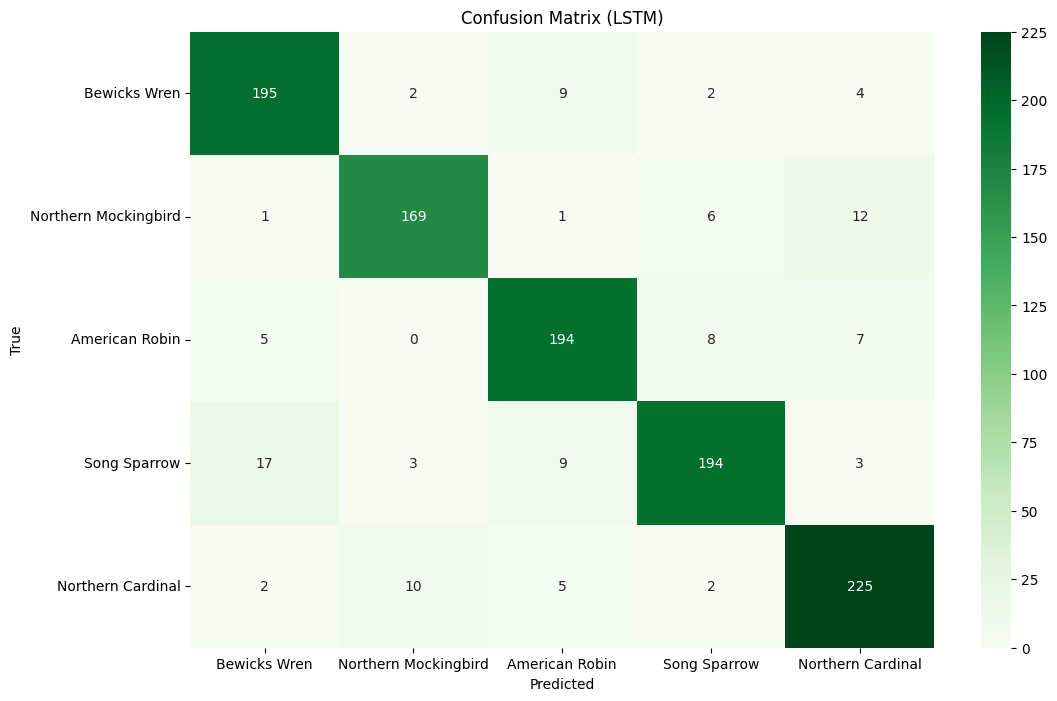

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

def plot_confusion_matrix(conf_matrix, class_names, model_name, save_path=None):
    plt.figure(figsize=(12, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    if save_path:
        plt.savefig(save_path)  # Save the confusion matrix plot as jpg
    else:
        plt.show()

# Load the trained LSTM model
lstm_model = load_model('saved_models/audio_classification_lstm.hdf5')

# Make predictions on the test set
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Convert one-hot encoded labels to class indices
y_true_lstm = np.argmax(y_test, axis=1)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)

# Generate confusion matrix
conf_matrix_lstm = confusion_matrix(y_true_lstm, y_pred_lstm)

# Plot and save confusion matrix
plot_confusion_matrix(conf_matrix_lstm, ['Bewicks Wren', 'Northern Mockingbird', 'American Robin', 'Song Sparrow', 'Northern Cardinal'],
                      'LSTM', 'lstm_confusion_matrix.jpg')

# Print classification report
print("Classification Report (LSTM):\n", classification_report(y_true_lstm, y_pred_lstm))

# VGGish

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

def vggish_model(input_shape, num_labels, dropout_rate=0.5, l2_reg=0.0001):
    model_input = Input(shape=input_shape, name='input')

    # Block 1
    x = Conv1D(128, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv1')(model_input)
    x = MaxPooling1D(pool_size=2, name='pool1')(x)

    # Block 2
    x = Conv1D(256, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv2')(x)
    x = MaxPooling1D(pool_size=2, name='pool2')(x)

    # Block 3
    x = Conv1D(512, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv3')(x)
    x = Conv1D(512, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv4')(x)
    x = MaxPooling1D(pool_size=2, name='pool3')(x)

    # Block 4
    x = Conv1D(1024, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv5')(x)
    x = Conv1D(1024, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv6')(x)
    x = MaxPooling1D(pool_size=2, name='pool4')(x)

    # Flatten and fully connected layers
    x = Flatten(name='flatten')(x)
    x = Dense(2048, activation='relu', kernel_regularizer='l2', name='fc1')(x)
    x = Dropout(dropout_rate, name='dropout1')(x)
    x = Dense(2048, activation='relu', kernel_regularizer='l2', name='fc2')(x)
    x = Dropout(dropout_rate, name='dropout2')(x)

    # Output layer
    model_output = Dense(num_labels, activation='softmax', name='predictions')(x)

    model = Model(inputs=model_input, outputs=model_output, name='vggish')
    return model

In [ ]:
# Reshape data for VGGish
X_train_vggish = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_vggish = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build and compile VGGish model with increased dropout and L2 regularization
vggish_model = vggish_model((X_train_vggish.shape[1], 1), num_labels, dropout_rate=0.7, l2_reg=0.0001)
vggish_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
vggish_model.summary()

Model: "vggish"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 40, 1)]           0         
                                                                 
 conv1 (Conv1D)              (None, 40, 128)           512       
                                                                 
 pool1 (MaxPooling1D)        (None, 20, 128)           0         
                                                                 
 conv2 (Conv1D)              (None, 20, 256)           98560     
                                                                 
 pool2 (MaxPooling1D)        (None, 10, 256)           0         
                                                                 
 conv3 (Conv1D)              (None, 10, 512)           393728    
                                                                 
 conv4 (Conv1D)              (None, 10, 512)           78694

In [ ]:
# Define checkpoint to save the best model
checkpoint_vggish = ModelCheckpoint(filepath='saved_models/audio_classification_vggish.hdf5', verbose=1, save_best_only=True)

# Implement early stopping based on validation loss
early_stopping_vggish = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
start_vggish = datetime.now()
history_vggish = vggish_model.fit(X_train_vggish, y_train, batch_size=128, epochs=100,
                                  validation_data=(X_test_vggish, y_test),
                                  callbacks=[checkpoint_vggish, early_stopping_vggish], verbose=1)

duration_vggish = datetime.now() - start_vggish
print("Training completed in time: ", duration_vggish)

Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 37.6951 - accuracy: 0.2576
Epoch 1: val_loss improved from inf to 16.61317, saving model to saved_models/audio_classification_vggish.hdf5
34/34 [==============================] - 11s 129ms/step - loss: 37.6951 - accuracy: 0.2576 - val_loss: 16.6132 - val_accuracy: 0.3696
Epoch 2/100
32/34 [===========================>..] - ETA: 0s - loss: 11.0843 - accuracy: 0.3875
Epoch 2: val_loss improved from 16.61317 to 6.98931, saving model to saved_models/audio_classification_vggish.hdf5
34/34 [==============================] - 2s 45ms/step - loss: 10.8728 - accuracy: 0.3871 - val_loss: 6.9893 - val_accuracy: 0.3991
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 5.3601 - accuracy: 0.3984
Epoch 3: val_loss improved from 6.98931 to 4.07214, saving model to saved_models/audio_classification_vggish.hdf5
34/34 [==============================] - 2s 52ms/step - loss: 5.3601 - accuracy: 0.3984 - val_loss: 4.0721 -

In [ ]:
filename="/content/wavfiles/468991-6.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = vggish_model.predict(mfccs_scaled_features)
predicted_class_index = np.argmax(predicted_label)
prediction_class = labelencoder.inverse_transform([predicted_class_index])
print(f"The predicted bird is: {prediction_class}")

[-2.4663928e+02  8.8387001e+01 -4.7339355e+01  3.0223005e+01
 -4.1527863e+01 -3.9176022e+01  1.0684089e+01 -4.1098094e+00
 -3.9905457e+01 -1.1904404e+01 -9.3045607e+00 -8.6586428e-01
 -2.0648674e+01 -1.0175041e+01  1.1601498e+00  1.3072042e+00
 -5.4266024e+00 -1.4039398e+01 -2.1302927e+00  7.3769355e+00
 -1.0083029e+01 -9.0987539e-01 -6.6288791e+00  7.1558368e-01
 -5.7691187e-01 -6.6837044e+00 -4.7908487e+00  1.8436044e-01
 -6.3529801e+00 -2.0362737e+00 -6.8436327e+00 -1.9668694e+00
 -2.2845643e+00 -2.2913871e+00 -5.6225042e+00 -1.2185013e+00
 -3.0618944e+00 -1.2907373e+00 -3.0073099e+00 -7.9383296e-01]
[[-2.4663928e+02  8.8387001e+01 -4.7339355e+01  3.0223005e+01
  -4.1527863e+01 -3.9176022e+01  1.0684089e+01 -4.1098094e+00
  -3.9905457e+01 -1.1904404e+01 -9.3045607e+00 -8.6586428e-01
  -2.0648674e+01 -1.0175041e+01  1.1601498e+00  1.3072042e+00
  -5.4266024e+00 -1.4039398e+01 -2.1302927e+00  7.3769355e+00
  -1.0083029e+01 -9.0987539e-01 -6.6288791e+00  7.1558368e-01
  -5.7691187e-01 

34/34 [==============================] - 0s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       212
           1       0.83      0.80      0.82       189
           2       0.92      0.94      0.93       214
           3       0.86      0.89      0.88       226
           4       0.87      0.88      0.87       244

    accuracy                           0.88      1085
   macro avg       0.88      0.88      0.88      1085
weighted avg       0.88      0.88      0.88      1085



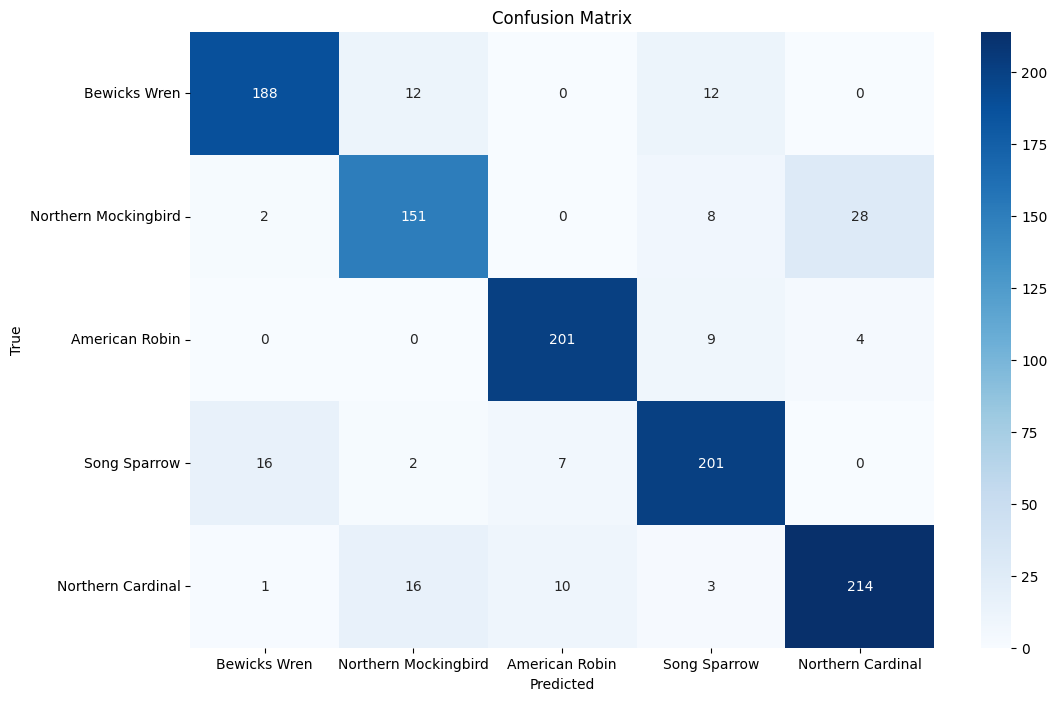

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

def plot_confusion_matrix(conf_matrix, class_names, save_path=None):
    plt.figure(figsize=(12, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    if save_path:
        plt.savefig(save_path)  # Save the confusion matrix plot as jpg
    else:
        plt.show()

# Load the trained VGGish model
vggish_model = load_model('saved_models/audio_classification_vggish.hdf5')

# Make predictions on the test set
y_pred = vggish_model.predict(X_test_vggish)

# Convert one-hot encoded labels to class indices
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot and save confusion matrix
plot_confusion_matrix(conf_matrix, ['Bewicks Wren', 'Northern Mockingbird', 'American Robin', 'Song Sparrow', 'Northern Cardinal'],
                      'vggish_confusion_matrix.jpg')

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))

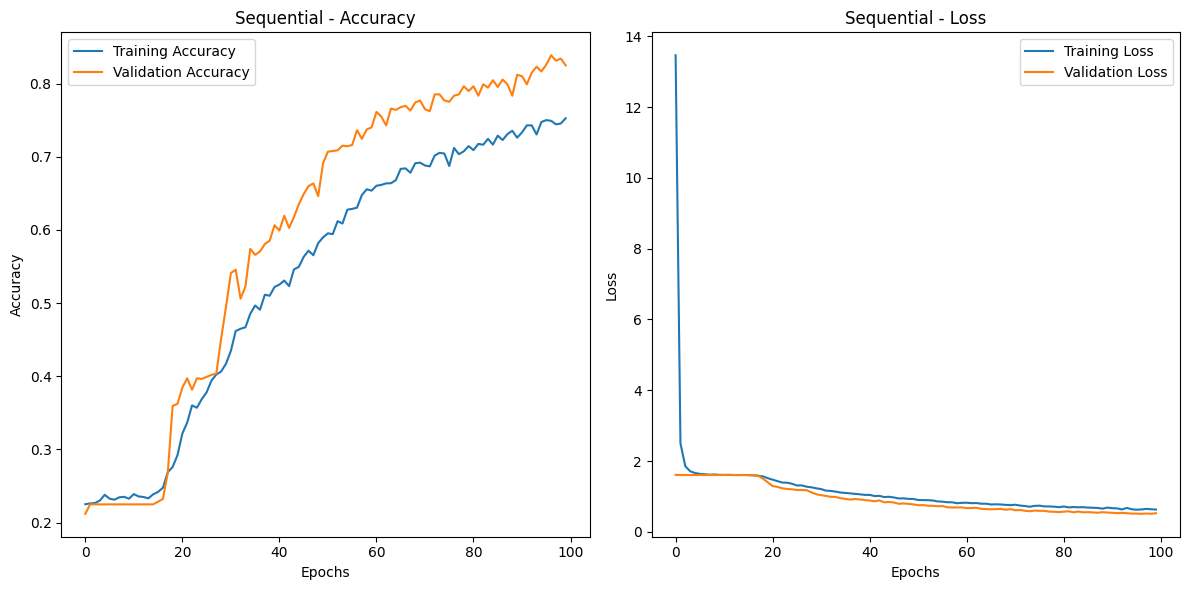

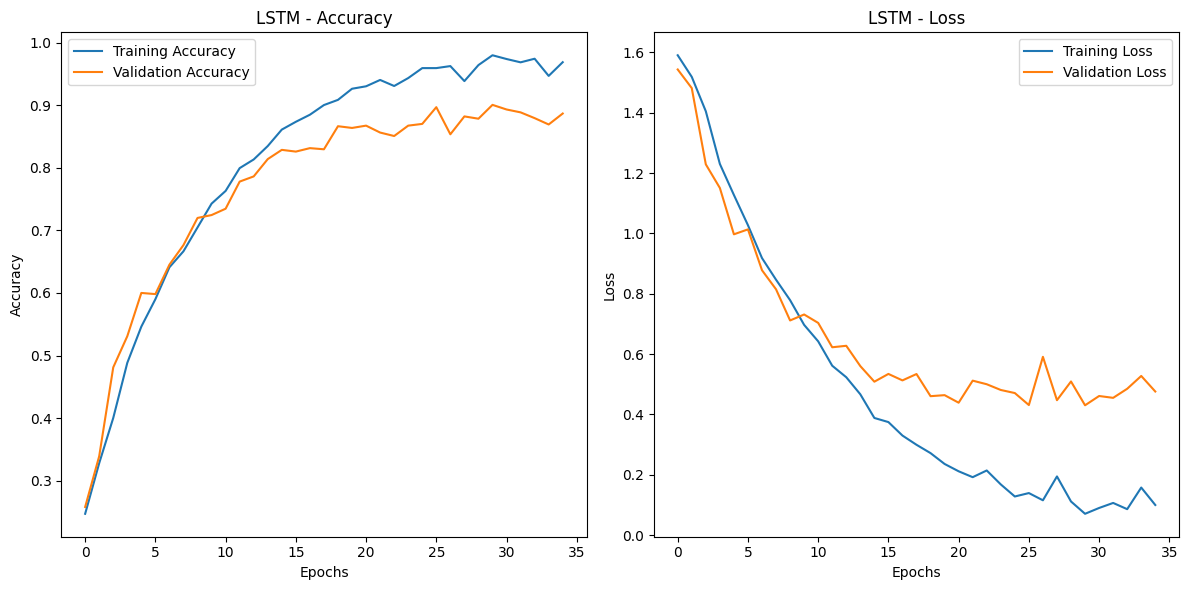

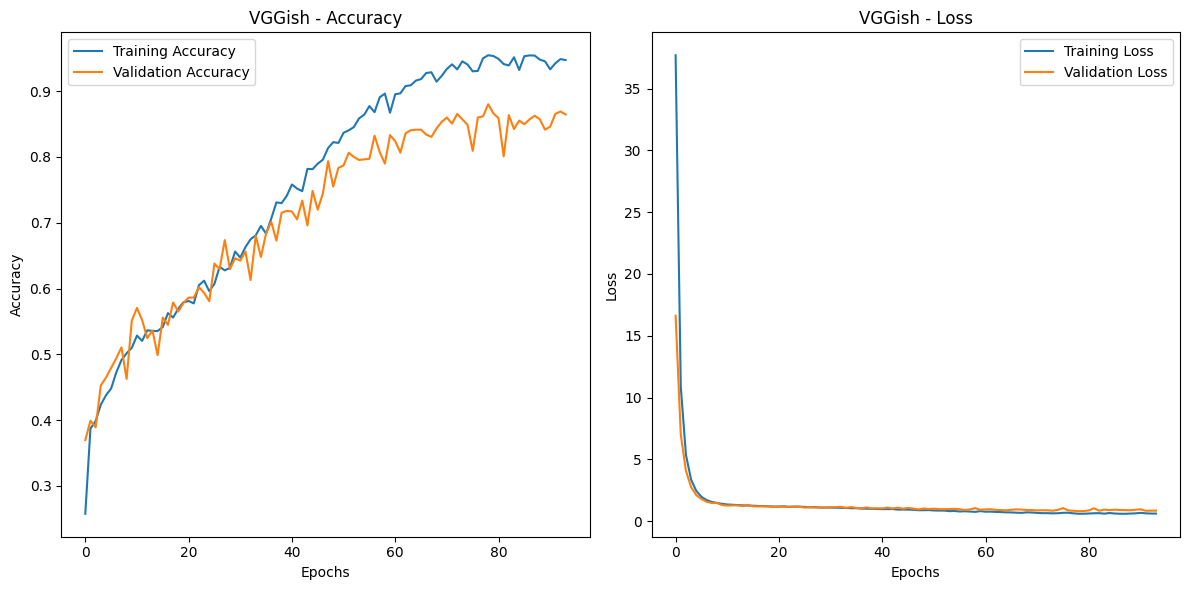

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history, title, save_path=None):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)  # Save the figure in jpg format
    else:
        plt.show()

# Plot graphs for the original model
plot_metrics(history, 'Sequential', 'sequential_metrics.jpg')

# Plot graphs for the LSTM model
plot_metrics(history_lstm, 'LSTM', 'lstm_metrics.jpg')

# Plot graphs for the VGGish model
plot_metrics(history_vggish, 'VGGish', 'vggish_metrics.jpg')

In [ ]:
from sklearn.metrics import classification_report
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(y_test, axis=1)
print(classification_report(y_test_pred, ypred))

34/34 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       212
           1       0.67      0.95      0.79       189
           2       0.88      0.86      0.87       214
           3       0.90      0.77      0.83       226
           4       0.87      0.70      0.78       244

    accuracy                           0.82      1085
   macro avg       0.83      0.83      0.83      1085
weighted avg       0.84      0.82      0.83      1085



In [ ]:
from sklearn.metrics import classification_report
ypred = model_lstm.predict(X_test)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(y_test, axis=1)
print(classification_report(y_test_pred, ypred))

34/34 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       212
           1       0.92      0.89      0.91       189
           2       0.89      0.91      0.90       214
           3       0.92      0.86      0.89       226
           4       0.90      0.92      0.91       244

    accuracy                           0.90      1085
   macro avg       0.90      0.90      0.90      1085
weighted avg       0.90      0.90      0.90      1085



In [ ]:
from sklearn.metrics import classification_report
ypred = vggish_model.predict(X_test_vggish)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(y_test, axis=1)
print(classification_report(y_test_pred, ypred))

34/34 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       212
           1       0.83      0.80      0.82       189
           2       0.92      0.94      0.93       214
           3       0.86      0.89      0.88       226
           4       0.87      0.88      0.87       244

    accuracy                           0.88      1085
   macro avg       0.88      0.88      0.88      1085
weighted avg       0.88      0.88      0.88      1085



# ResNet

In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Add, Dense, Activation, Flatten, BatchNormalization, Conv1D, AveragePooling1D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from datetime import datetime

# def resnet_block(X, filters, kernel_size=3, stride=1):
#     # Shortcut
#     X_shortcut = X

#     # First layer of the block
#     X = Conv1D(filters, kernel_size, strides=stride, padding='same')(X)
#     X = BatchNormalization()(X)
#     X = Activation('relu')(X)

#     # Second layer of the block
#     X = Conv1D(filters, kernel_size, strides=1, padding='same')(X)
#     X = BatchNormalization()(X)

#     # Shortcut path
#     X_shortcut = Conv1D(filters, kernel_size, strides=stride, padding='same')(X_shortcut)
#     X_shortcut = BatchNormalization()(X_shortcut)

#     # Add shortcut to main path
#     X = Add()([X, X_shortcut])
#     X = Activation('relu')(X)

#     return X

In [ ]:
# # Model
# def build_resnet(input_shape, num_labels):
#     X_input = Input(input_shape)

#     # Initial Conv1D layer
#     X = Conv1D(64, 7, strides=2, padding='same')(X_input)
#     X = BatchNormalization()(X)
#     X = Activation('relu')(X)

#     # Residual blocks
#     X = resnet_block(X, 128, 3, 1)  # Increased filters
#     X = resnet_block(X, 128, 3, 1)

#     X = AveragePooling1D(2)(X)

#     X = resnet_block(X, 256, 3, 2)  # Increased filters and changed stride
#     X = resnet_block(X, 256, 3, 1)

#     X = AveragePooling1D(2)(X)

#     # Flatten and output layer
#     X = Flatten()(X)
#     X = Dense(num_labels, activation='softmax')(X)

#     model = Model(inputs=X_input, outputs=X, name='ResNet')

#     return model

In [ ]:
# # Reshape data for ResNet
# X_train_resnet = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_resnet = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# resnet_model = build_resnet((X_train_resnet.shape[1], 1), num_labels)
# resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Model summary
# resnet_model.summary()

In [ ]:
# checkpoint_resnet = ModelCheckpoint(filepath='saved_models/audio_classification_resnet.hdf5', verbose=1, save_best_only=True)

# # Implement early stopping based on validation loss
# early_stopping_resnet = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model
# start_resnet = datetime.now()
# history_resnet = resnet_model.fit(X_train_resnet, y_train, batch_size=32, epochs=40,
#                                                     validation_data=(X_test_resnet, y_test),
#                                                     callbacks=[checkpoint_resnet, early_stopping_resnet], verbose=1)

# duration_resnet = datetime.now() - start_resnet
# print("Training completed in time: ", duration_resnet)

In [ ]:
# filename="/content/wavfiles/468991-6.wav"
# audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
# mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
# mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# print(mfccs_scaled_features)
# mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)
# predicted_label = resnet_model.predict(mfccs_scaled_features)
# predicted_class_index = np.argmax(predicted_label)
# prediction_class = labelencoder.inverse_transform([predicted_class_index])
# print(f"The predicted bird is: {prediction_class}")

# VGGish 2

In [ ]:
# from sklearn.metrics import classification_report
# ypred = resnet_model.predict(X_test)
# ypred = np.argmax(ypred, axis=1)
# y_test_pred = np.argmax(y_test, axis=1)
# print(classification_report(y_test_pred, ypred))

In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from datetime import datetime

# def vggish_model(input_shape, num_labels, dropout_rate=0.5, l2_reg=0.0001):
#     model_input = Input(shape=input_shape, name='input')

#     # Block 1
#     x = Conv1D(128, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv1')(model_input)
#     x = MaxPooling1D(pool_size=2, name='pool1')(x)

#     # Block 2
#     x = Conv1D(256, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv2')(x)
#     x = MaxPooling1D(pool_size=2, name='pool2')(x)

#     # Block 3
#     x = Conv1D(512, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv3')(x)
#     x = Conv1D(512, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv4')(x)
#     x = MaxPooling1D(pool_size=2, name='pool3')(x)

#     # Block 4
#     x = Conv1D(1024, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv5')(x)
#     x = Conv1D(1024, kernel_size=3, activation='relu', padding='same', kernel_regularizer='l2', name='conv6')(x)
#     x = MaxPooling1D(pool_size=2, name='pool4')(x)

#     # Flatten and fully connected layers
#     x = Flatten(name='flatten')(x)
#     x = Dense(2048, activation='relu', kernel_regularizer='l2', name='fc1')(x)
#     x = Dropout(dropout_rate, name='dropout1')(x)
#     x = Dense(2048, activation='relu', kernel_regularizer='l2', name='fc2')(x)
#     x = Dropout(dropout_rate, name='dropout2')(x)

#     # Output layer
#     model_output = Dense(num_labels, activation='softmax', name='predictions')(x)

#     model = Model(inputs=model_input, outputs=model_output, name='vggish')
#     return model

In [ ]:
# # Reshape data for VGGish
# X_train_vggish = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_vggish = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# # Build and compile VGGish model with increased dropout and L2 regularization
# vggish_model = vggish_model((X_train_vggish.shape[1], 1), num_labels, dropout_rate=0.7, l2_reg=0.0001)
# vggish_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Model summary
# vggish_model.summary()

In [ ]:
# # Define checkpoint to save the best model
# checkpoint_vggish = ModelCheckpoint(filepath='saved_models/audio_classification_vggish.hdf5', verbose=1, save_best_only=True)

# # Implement early stopping based on validation loss
# early_stopping_vggish = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# # Train the model
# start_vggish = datetime.now()
# history_vggish = vggish_model.fit(X_train_vggish, y_train, batch_size=128, epochs=100,
#                                   validation_data=(X_test_vggish, y_test),
#                                   callbacks=[checkpoint_vggish, early_stopping_vggish], verbose=1)

# duration_vggish = datetime.now() - start_vggish
# print("Training completed in time: ", duration_vggish)

In [ ]:
# # Plot training and validation curves
# plt.figure(figsize=(12, 6))

# # Plot training & validation accuracy values
# plt.subplot(1, 2, 1)
# plt.plot(history_vggish.history['accuracy'])
# plt.plot(history_vggish.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Validation'], loc='upper left')

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history_vggish.history['loss'])
# plt.plot(history_vggish.history['val_loss'])
# plt.title('Model loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Validation'], loc='upper left')

# plt.tight_layout()
# plt.show()

In [ ]:
# from sklearn.metrics import classification_report
# ypred = vggish_model.predict(X_test)
# ypred = np.argmax(ypred, axis=1)
# y_test_pred = np.argmax(y_test, axis=1)
# print(classification_report(y_test_pred, ypred))

In [ ]:
# filename="/content/wavfiles/468991-6.wav"
# audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
# mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
# mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# print(mfccs_scaled_features)
# mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)
# predicted_label = vggish_model.predict(mfccs_scaled_features)
# predicted_class_index = np.argmax(predicted_label)
# prediction_class = labelencoder.inverse_transform([predicted_class_index])
# print(f"The predicted bird is: {prediction_class}")